<a href="https://colab.research.google.com/github/julika333/TMS-DS/blob/main/lesson_28_Car_test/HW_28_3models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

car_price_data = pd.read_csv('/content/sample_data/CarPrice_Assignment.csv')
# df = cap_price_data.drop(['car_ID', 'CarName', 'symboling', 'compressionratio', 'stroke'], axis=1, inplace=True).copy()
# df.info()

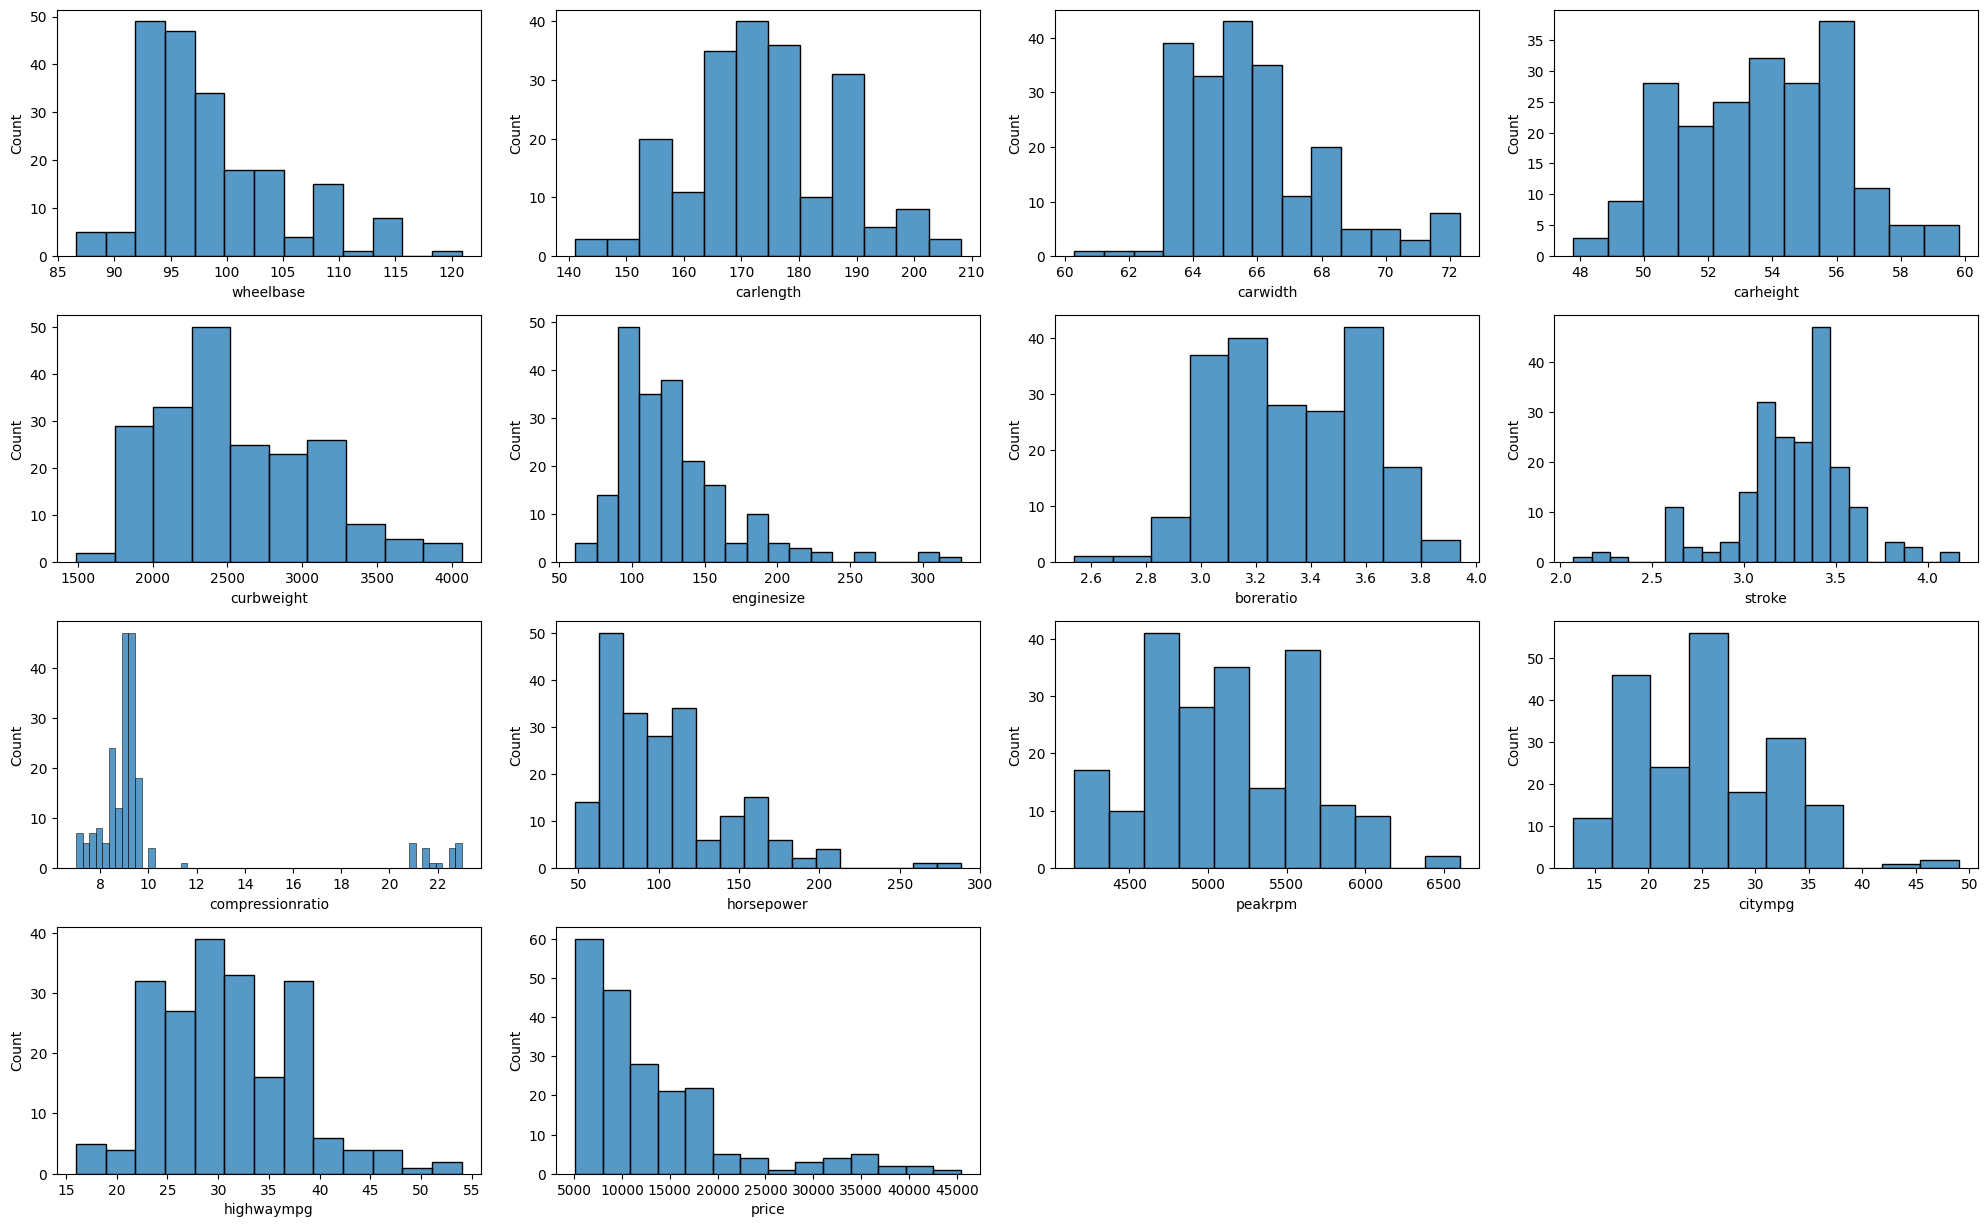

In [4]:
car_price_data.drop(['CarName','car_ID','symboling'], axis=1, inplace=True)

plt.figure(figsize = (20, 15))
plotnumber = 1
num_cols = [col for col in car_price_data.columns if car_price_data[col].dtype != 'object']

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(5, 4, plotnumber)
        skewness = car_price_data[column].skew()
        sns.histplot(car_price_data[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [5]:
y = car_price_data['price']
X = car_price_data.drop(columns=['price'])


In [6]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

In [ ]:
categorical_features

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

In [8]:
def evaluate_model(model, X_train, X_test, y_train, y_test, epochs=None):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    # Training the model
    if epochs:
      pipeline.fit(X_train, y_train, model__epochs=epochs)
    else:
      pipeline.fit(X_train, y_train)

    # Predictions
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)

    # Evaluation metrics
    results = {
        'Train MAE': mean_absolute_error(y_train, y_pred_train),
        'Test MAE': mean_absolute_error(y_test, y_pred_test),
        'Train MSE': mean_squared_error(y_train, y_pred_train),
        'Test MSE': mean_squared_error(y_test, y_pred_test),
        'Train R2': r2_score(y_train, y_pred_train),
        'Test R2': r2_score(y_test, y_pred_test),
    }
    # plt.figure(figsize=(10, 6))
    # plt.scatter(y_test, y_test - y_pred_test, color='blue', edgecolor='k', alpha=0.7)
    # plt.axhline(y=0, color='red', linestyle='--')
    # plt.xlabel('Actual Prices')
    # plt.ylabel('Residuals')
    # plt.title('Random Forest Regressor')
    # plt.show()

    return results

# MODEL 1: Neural Network

In [9]:
# import tensorflow.keras as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mse

nn_model = Sequential([
    Dense(256, activation = relu),
    Dense(128, activation = relu),
    Dense(64, activation = relu),
    Dense(1)
])

# compiling the model
nn_model.compile(loss = mse, optimizer = Adam(learning_rate = 0.01,), metrics = ['mae'] )

In [10]:
nn_results = evaluate_model(nn_model, X_train, X_test, y_train, y_test, 500)

print("Random Forest Regressor Results:", nn_results)

Epoch 1/500
6/6 [==============================] - 2s 13ms/step - loss: 233892160.0000 - mae: 13202.8486
Epoch 2/500
6/6 [==============================] - 0s 7ms/step - loss: 218991648.0000 - mae: 12720.6270
Epoch 3/500
6/6 [==============================] - 0s 8ms/step - loss: 145532368.0000 - mae: 9848.0801
Epoch 4/500
6/6 [==============================] - 0s 6ms/step - loss: 33637584.0000 - mae: 4293.9819
Epoch 5/500
6/6 [==============================] - 0s 5ms/step - loss: 44907736.0000 - mae: 5139.9575
Epoch 6/500
6/6 [==============================] - 0s 6ms/step - loss: 20908408.0000 - mae: 3426.2893
Epoch 7/500
6/6 [==============================] - 0s 8ms/step - loss: 20407988.0000 - mae: 3378.0461
Epoch 8/500
6/6 [==============================] - 0s 6ms/step - loss: 11088535.0000 - mae: 2453.5840
Epoch 9/500
6/6 [==============================] - 0s 5ms/step - loss: 10388931.0000 - mae: 2367.1008
Epoch 10/500
6/6 [==============================] - 0s 6ms/step - loss: 8945

# Model 2: RandomForestRegressor

In [11]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_results = evaluate_model(rf_model, X_train, X_test, y_train, y_test)

print("Random Forest Regressor Results:", rf_results)

Random Forest Regressor Results: {'Train MAE': 599.8428709349594, 'Test MAE': 1271.7028170731708, 'Train MSE': 931250.6580214216, 'Test MSE': 3322876.1717842068, 'Train R2': 0.9843849022895664, 'Test R2': 0.9579084503834736}


# Model 3: GradientBoostingRegressor

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=10, loss='absolute_error',random_state=42)
gb_results = evaluate_model(gb_model, X_train, X_test, y_train, y_test)

print("Gradient Boosting Regressor Results:", gb_results)

Gradient Boosting Regressor Results: {'Train MAE': 73.90245821978812, 'Test MAE': 1363.302762648212, 'Train MSE': 169896.61262086264, 'Test MSE': 4748924.374285967, 'Train R2': 0.9971511942741785, 'Test R2': 0.9398444071967752}


# Model 4: SVR

In [13]:
from sklearn.svm import SVR

svr_model = SVR()
svr_results = evaluate_model(svr_model, X_train, X_test, y_train, y_test)

print("Gradient Boosting Regressor Results:", svr_results)

Gradient Boosting Regressor Results: {'Train MAE': 5429.713099151764, 'Test MAE': 5694.084662511352, 'Train MSE': 66077352.347857065, 'Test MSE': 86805916.20919947, 'Train R2': -0.10797700326006132, 'Test R2': -0.09958823026669084}


In [15]:
results_df = pd.DataFrame({
    'Model': ['Neural Network', 'Random Forest Regressor', 'Gradient Boosting Regressor', 'Support Vector Regressor'],
    'Train MAE': [nn_results['Train MAE'], rf_results['Train MAE'], gb_results['Train MAE'], svr_results['Train MAE']],
    'Test MAE': [nn_results['Test MAE'], rf_results['Test MAE'], gb_results['Test MAE'], svr_results['Test MAE']],
    'Train MSE': [nn_results['Train MSE'], rf_results['Train MSE'], gb_results['Train MSE'], svr_results['Train MSE']],
    'Test MSE': [nn_results['Test MSE'], rf_results['Test MSE'], gb_results['Test MSE'], svr_results['Test MSE']],
    'Train R2': [nn_results['Train R2'], rf_results['Train R2'], gb_results['Train R2'], svr_results['Train R2']],
    'Test R2': [nn_results['Test R2'], rf_results['Test R2'], gb_results['Test R2'], svr_results['Test R2']],
})

results_df

,Model,Train MAE,Test MAE,Train MSE,Test MSE,Train R2,Test R2
0,Neural Network,389.728653,1872.841856,3.673216e+05,6.388436e+06,0.993841,0.919076
1,Random Forest Regressor,599.842871,1271.702817,9.312507e+05,3.322876e+06,0.984385,0.957908
2,Gradient Boosting Regressor,73.902458,1363.302763,1.698966e+05,4.748924e+06,0.997151,0.939844
3,Support Vector Regressor,5429.713099,5694.084663,6.607735e+07,8.680592e+07,-0.107977,-0.099588
